<a href="https://colab.research.google.com/github/FoxEW/Car-Insurance-Claims/blob/main/Car_Insurance_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Models | Car Insurance Claims**
Author: Eric


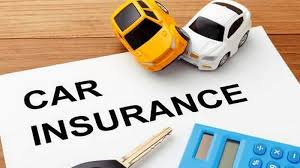

## **Sample Data Used:**
https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

## **Context and Data Dictionary:**
A **Car Insurance Company** has a need to derive more value from available insurance & claims related data.

In summary the data set consists of 10,000 rows of data - detailing 19 features re. Clients and insurance related events.

Granularity of data:
On a record level - each row provides details of a client's insurance related activities.

- **"Outcome"** = Provides the claim status (activities) of the Client (1 = Claimed, 0 = Not Claimed).

- From a Business requirement perspective - the goal is to output a predicted  **"Target"** value for "Outcome".
- This value will predict the possibility that a Client will claim against their Insurance Policy.
- This will be based on analysis and learnings from the Customer's behaviour and data available.

- This output can be obtained via the use of a ML model - that will analyze and predict this **"Target"** result value for each Client.

From a ML model perspective - this is a typical **Binary Classification** requirement to solve.

The below features in the data set - provides more detail re. Client and Claim related events:

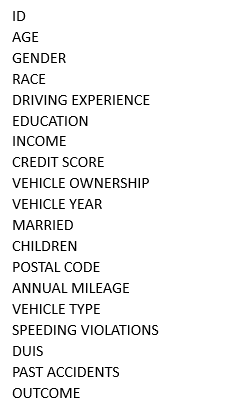


### **Import Libraries**:

In [447]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Set global scikit-learn configuration
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

### **Load Data**:

In [448]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [449]:
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/03-AdvancedML/Car_Insurance_Claim.csv")
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## **Inspect Data:**

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [451]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [452]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10000 rows and 19 columns.
The rows represent 10000 observations, and the columns represent 18 features and 1 target variable.


### **Data Cleaning**:

1. **Check for Unnecessary columns**

    Both Features ```ID``` and ```POSTAL_CODE``` will be removed from the data set - as these features won't directly affect the outcome.


In [453]:
df = df.drop(columns=['ID','POSTAL_CODE'])

2. **Check for Duplicate rows**

In [454]:
print(f' There are {df.duplicated().sum()} duplicate rows in the data.')

 There are 20 duplicate rows in the data.


In [455]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f' There are now {df.duplicated().sum()} duplicate rows after duplicates were dropped.')

 There are now 0 duplicate rows after duplicates were dropped.


3. **Check for Missing values**

In [456]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 1914 missing values.


In [457]:
# Check for missing values per feature
df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           962
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         952
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

There are missing values in ```CREDIT_SCORE``` as well in ```ANNUAL_MILEAGE```.
- Values are both numeric.

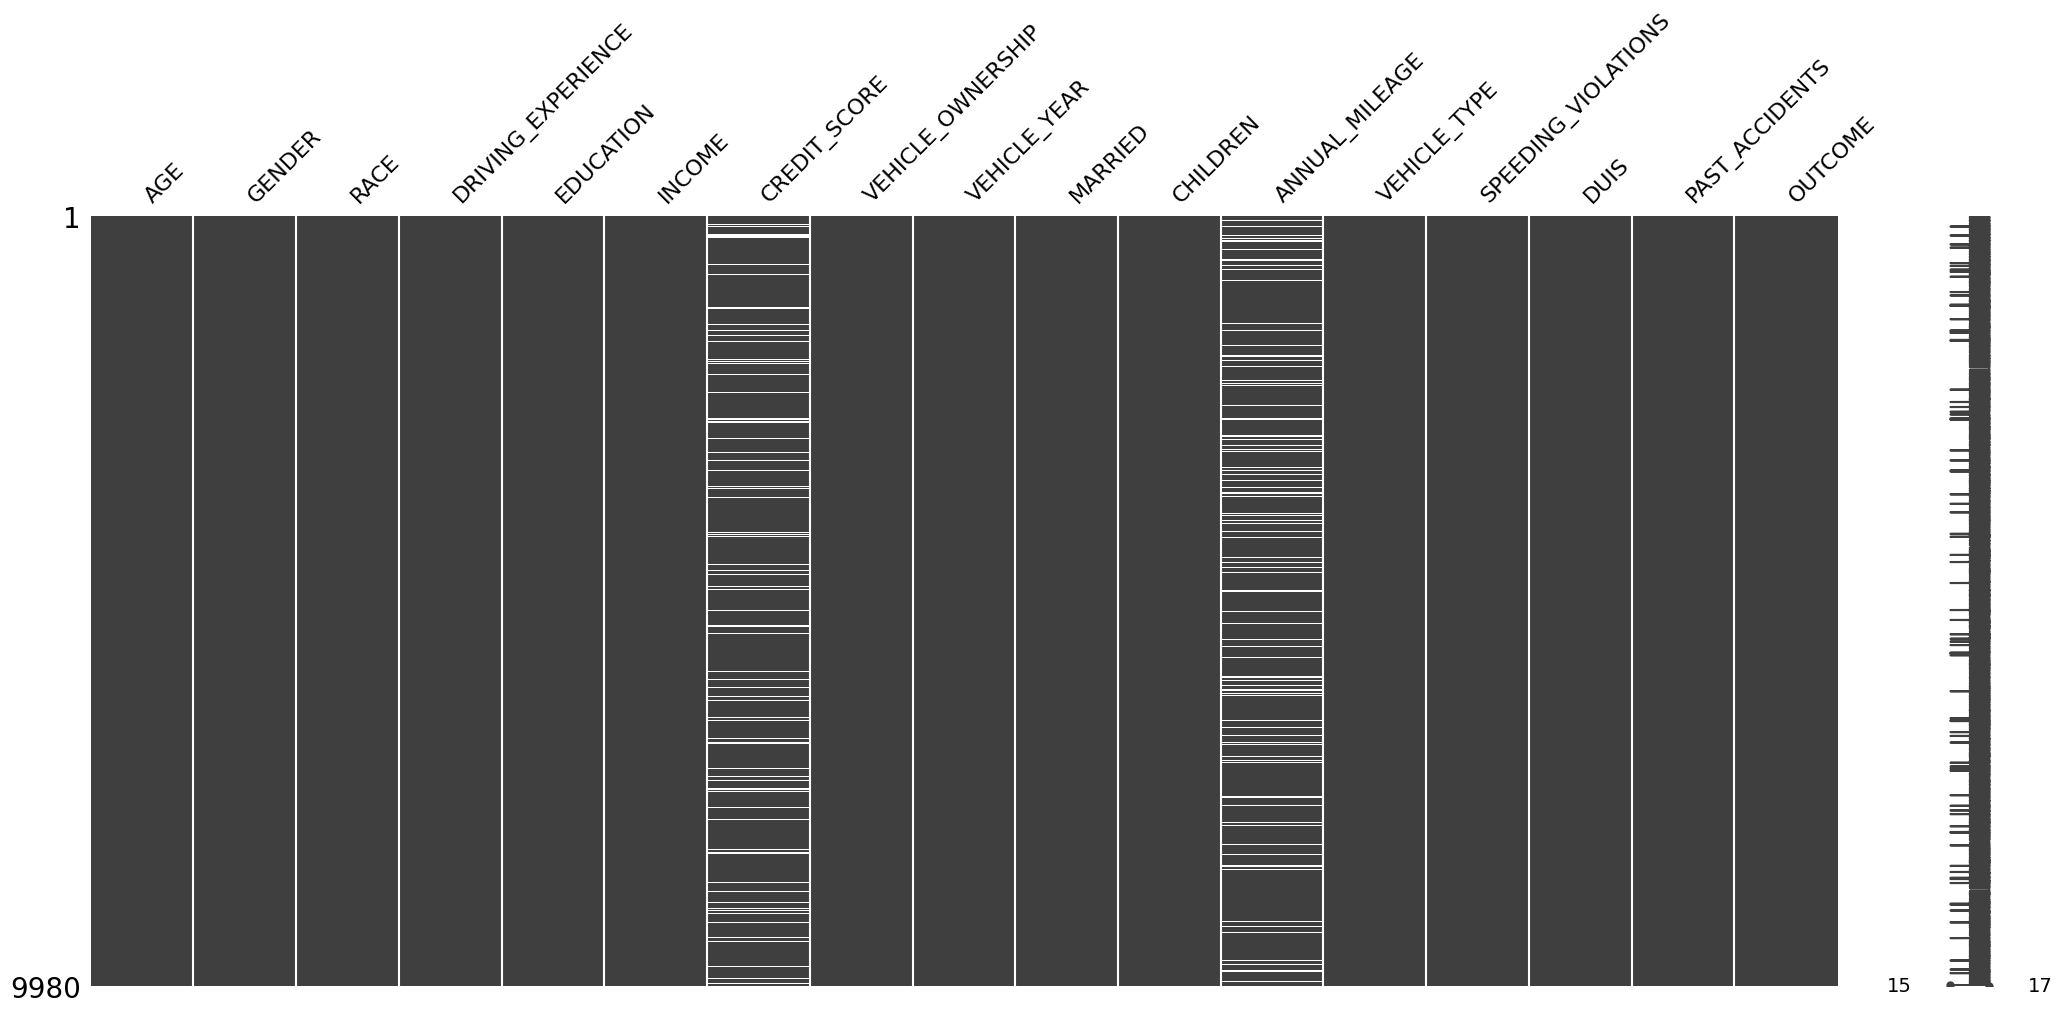

In [458]:
import missingno as msno
msno.matrix(df);

A spread of the missing values can be seen in the matrix above.
- No correlation appears to be between the mssing values in the ```CREDIT_SCORE``` and ```ANNUAL_MILEAGE``` columns.

In [459]:
# Missing values will be imputed with the mean
# Initial check performed if the mean is influenced by any outliers
df[['CREDIT_SCORE','ANNUAL_MILEAGE']].describe()

,CREDIT_SCORE,ANNUAL_MILEAGE
count,9018.000000,9028.000000
mean,0.515813,11694.395215
std,0.137688,2818.615350
min,0.053358,2000.000000
25%,0.417191,10000.000000
50%,0.525033,12000.000000
75%,0.618312,14000.000000
max,0.960819,22000.000000


**Result outcome:**

- The mean for both numerical colums -  appears NOT to be influenced by any value inconsistencies or outliers.

In [460]:
# Impute missing values in numerical columns with the mean
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean().round(1),inplace = True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean().round(1),inplace = True)

# Check if there are stil missing values after impute step
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


3. **Check for Data Inconsistencies (Categorical)**

In [461]:
string_cols = df.select_dtypes("object").columns
string_cols

for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for AGE
26-39    3061
40-64    2930
16-25    1999
65+      1990
Name: AGE, dtype: int64


Value Counts for GENDER
female    4998
male      4982
Name: GENDER, dtype: int64


Value Counts for RACE
majority    8992
minority     988
Name: RACE, dtype: int64


Value Counts for DRIVING_EXPERIENCE
0-9y      3513
10-19y    3297
20-29y    2118
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


Value Counts for EDUCATION
high school    4148
university     3925
none           1907
Name: EDUCATION, dtype: int64


Value Counts for INCOME
upper class      4334
middle class     2137
poverty          1798
working class    1711
Name: INCOME, dtype: int64


Value Counts for VEHICLE_YEAR
before 2015    6948
after 2015     3032
Name: VEHICLE_YEAR, dtype: int64


Value Counts for VEHICLE_TYPE
sedan         9503
sports car     477
Name: VEHICLE_TYPE, dtype: int64




There appears to be NO data inconsistencies in categorical values.

4. **Check for Data Inconsistencies (Numeric)**

In [462]:
df.describe(include = 'number')

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,0.514289,0.697796,0.498998,0.689479,11694.395671,1.485271,0.239679,1.058016,0.312425
std,0.130966,0.459236,0.500024,0.462730,2680.797579,2.243313,0.555443,1.653446,0.463505
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431222,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.504622,1.000000,0.000000,1.000000,11694.400000,0.000000,0.000000,0.000000,0.000000
75%,0.607780,1.000000,1.000000,1.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


There appears to be NO data inconsistencies in numeric values.

### **Data Analysis - Exploratory:**

**Univariate Visualizations (Categorical Features)**

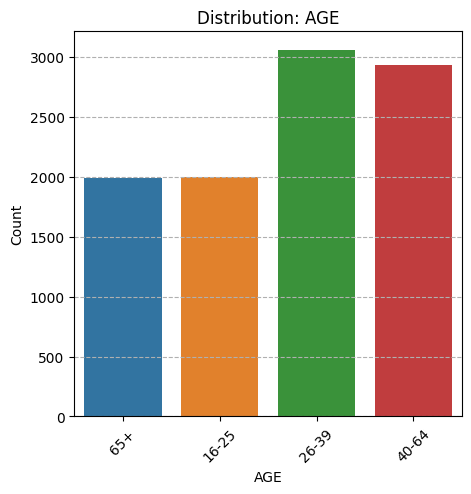

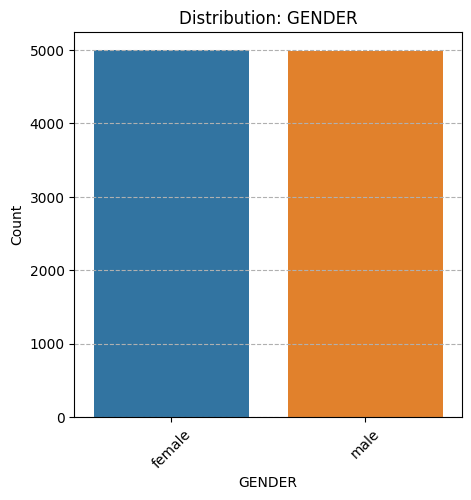

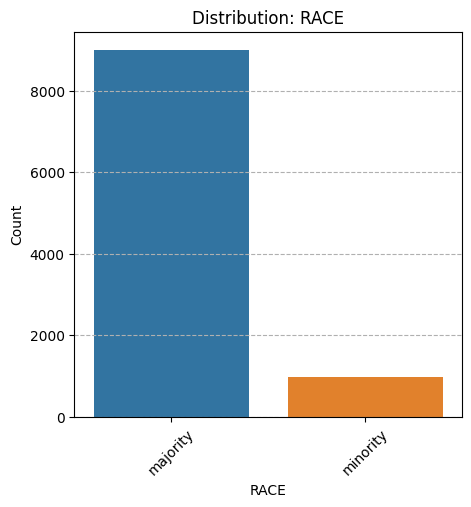

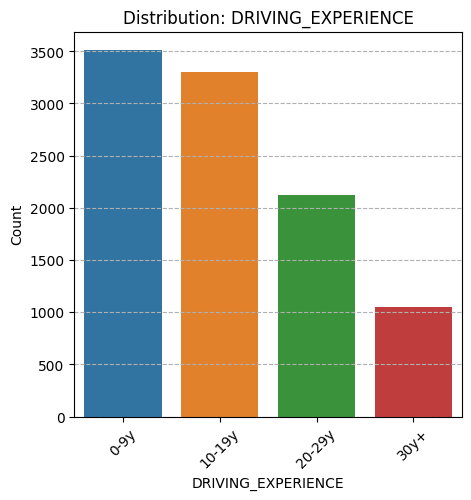

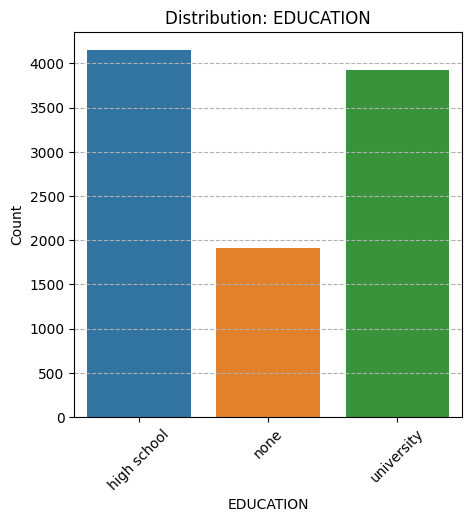

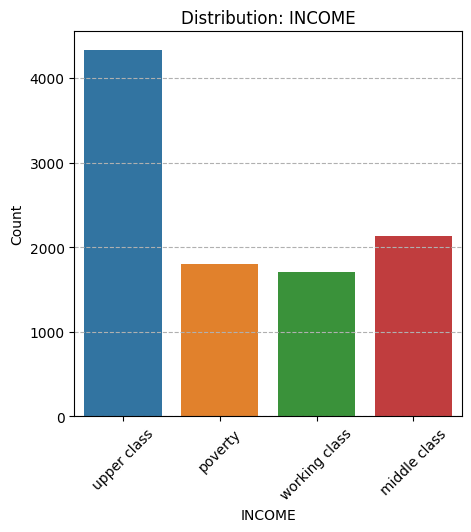

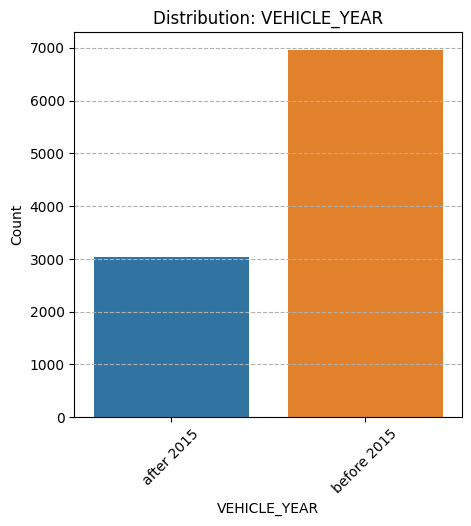

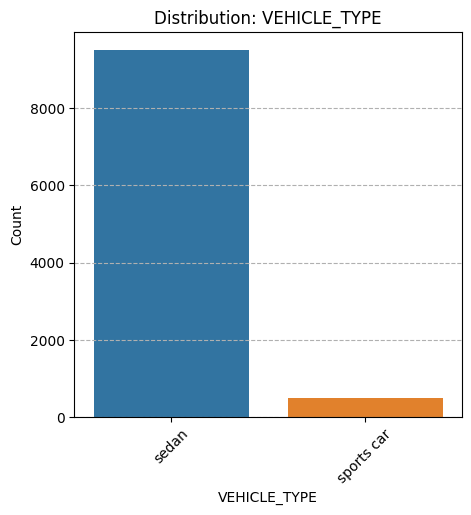

In [463]:
import seaborn as sns
# Categorical Variables
for col in string_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution: {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--')
    plt.show()

**Univariate Visualizations (Numeric Features)**


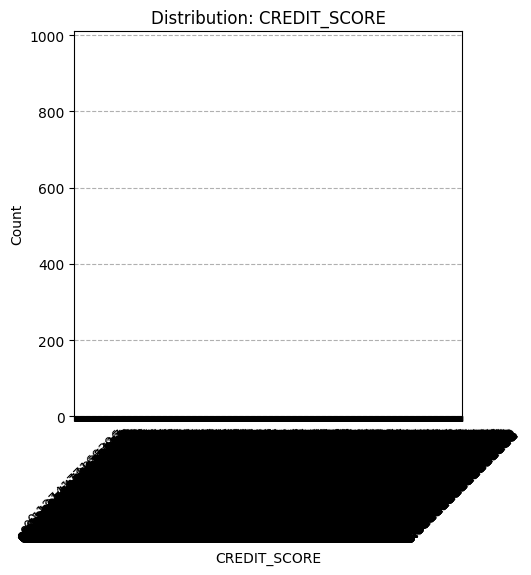

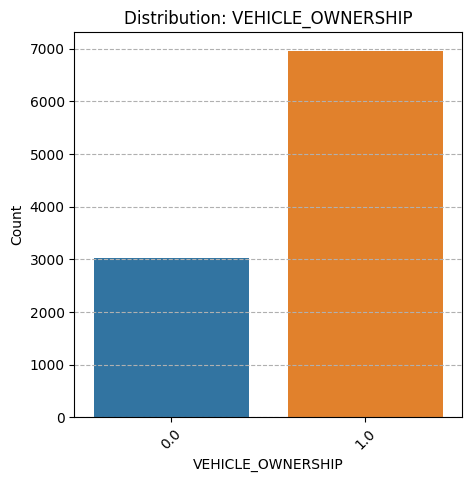

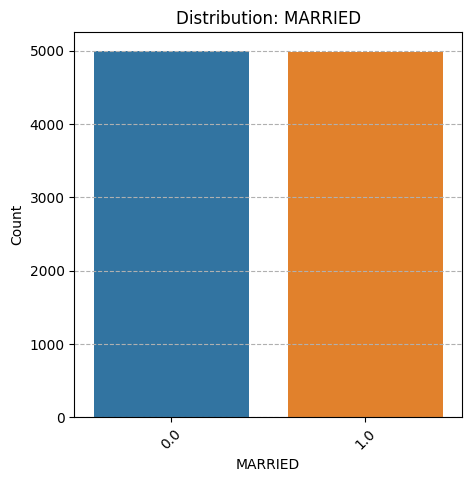

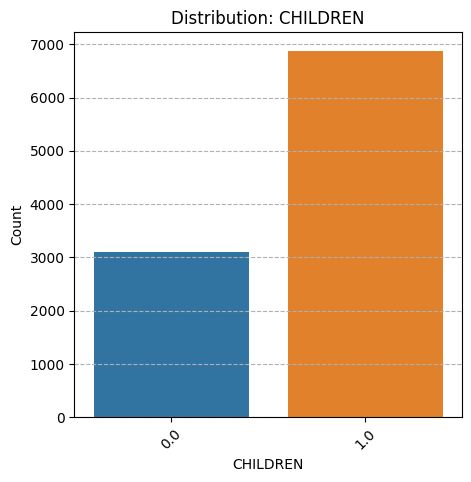

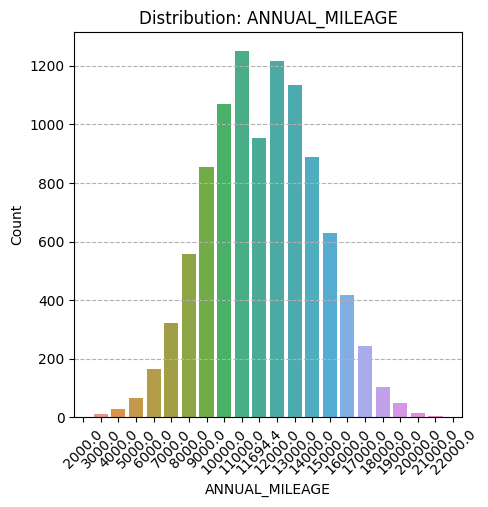

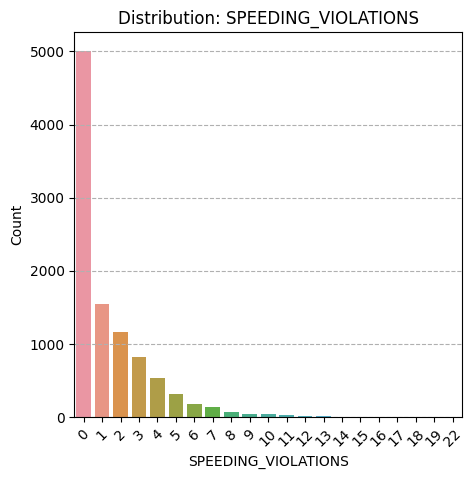

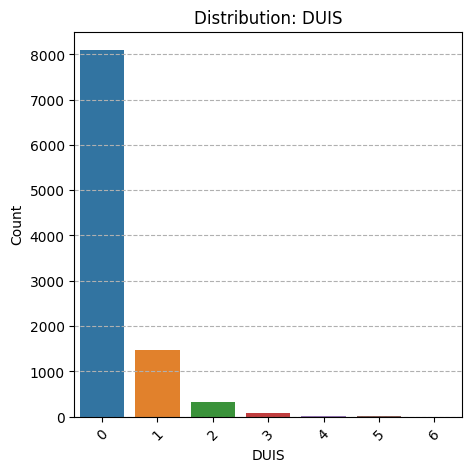

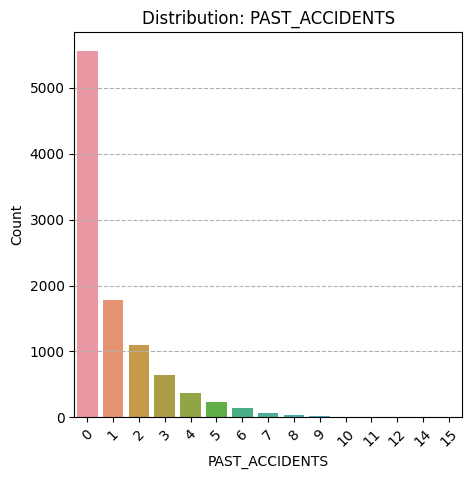

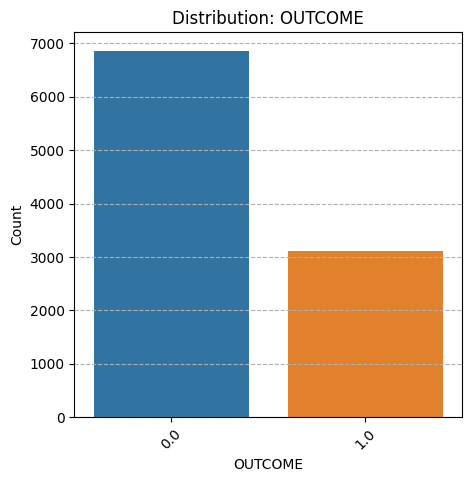

In [464]:
# Numeric Features
num_cols = df.select_dtypes('number').columns
num_cols

for num in num_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df,x=num)
    plt.title(f'Distribution: {num}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--')
    plt.show()

**Correlation Visualization (Heatmap)**

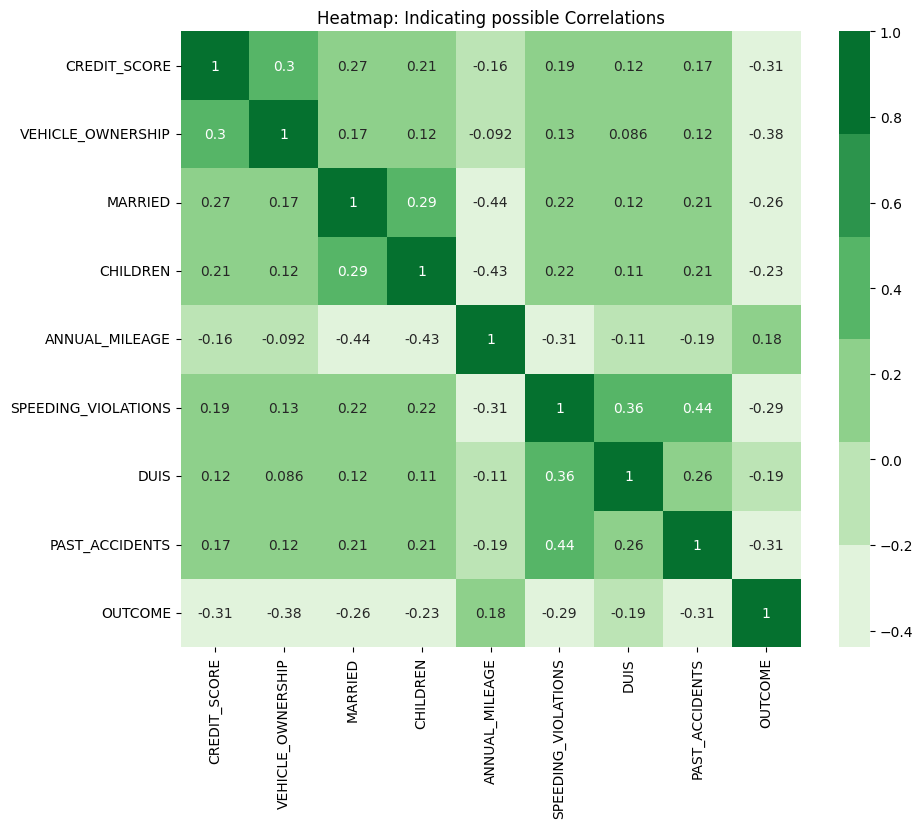

In [465]:
# Compile a Heatmap to show Correlations
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.color_palette("Greens")
plt.title('Heatmap: Indicating possible Correlations')
sns.heatmap(corr, annot = True, cmap=colormap);

**Heatmap:**
The visual above indicates possible correlations that exist within the data set.  


**Comments & Observations:**

- ```DUIS``` (0.36) and ```PAST_ACCIDENTS``` (0.44) are strongly correlated to ```SPEEDING_VIOLATIONS```.
- A correlation exists between ```CREDIT_SCORE``` and ```VEHICLE_OWNERSHIP``` (0.30).
- The highest feature correlation to target (```OUTCOME```) is ```ANNUAL_MILEAGE``` - being only (0.18).
- The correlation between ```CHILDREN``` and ```MARRIED``` is positive but not very relevant to the target.


**Keypoints when using Heatmaps:**
- Levels of colour intensity and value outputs are used to indicate the presence of correlations between dimensions in the data.  
- Darker or more intense colours - indicate a higher level of correlation.
- Values range between -1 and +1.
- Positive correlations are indicated with values that are closer to 1.

**Multivariate Visualizations**

The above postive (strong) correlations identified in the Heatmap - can be explored through the multivariate visualizations below ...

Text(0.5, 1.0, 'Comparison: Speeding Violations vs. Past Accidents')

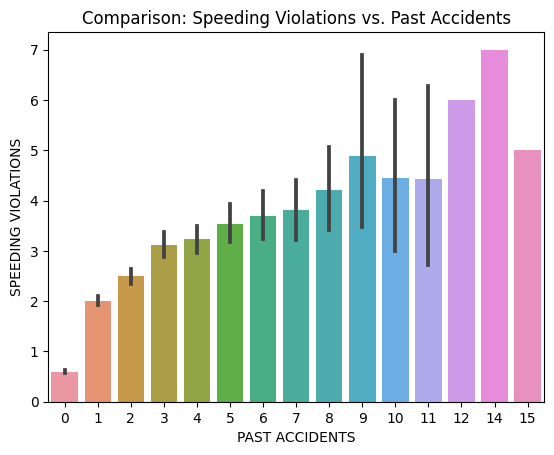

In [466]:
# Barplot
sns.barplot(data=df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS')

plt.xlabel("PAST ACCIDENTS")
plt.ylabel("SPEEDING VIOLATIONS")
plt.title("Comparison: Speeding Violations vs. Past Accidents")

Text(0.5, 1.0, 'Comparison: Speeding Violations vs. DUIS')

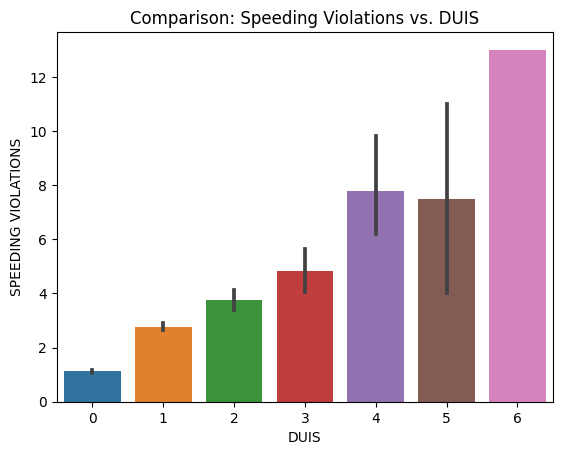

In [467]:
# Barplot
sns.barplot(data=df, x='DUIS', y='SPEEDING_VIOLATIONS')

plt.xlabel("DUIS")
plt.ylabel("SPEEDING VIOLATIONS")
plt.title("Comparison: Speeding Violations vs. DUIS")

Text(0, 0.5, 'CREDIT SCORE')

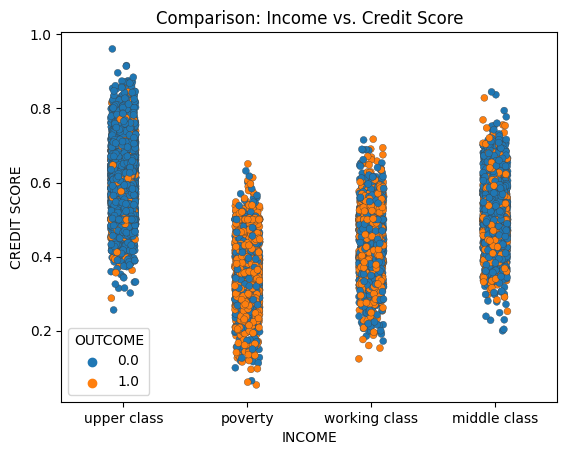

In [468]:
sns.stripplot(data=df, x="INCOME", y="CREDIT_SCORE", hue="OUTCOME", linewidth=0.25)
plt.title("Comparison: Income vs. Credit Score")
plt.xlabel("INCOME")
plt.ylabel("CREDIT SCORE")

**Comments & Observations:**

- Accidents and DUIS increase where Speeding Violations increase.
- Customers in the lower income groups - tend to have more insurance claims ```OUTCOME```.
- Customers in the ```POVERTY``` income group - tend to have lower ```CREDIT SCORE```.

**Stakeholder Visualizations**

Text(0, 0.5, 'Number of Claims')

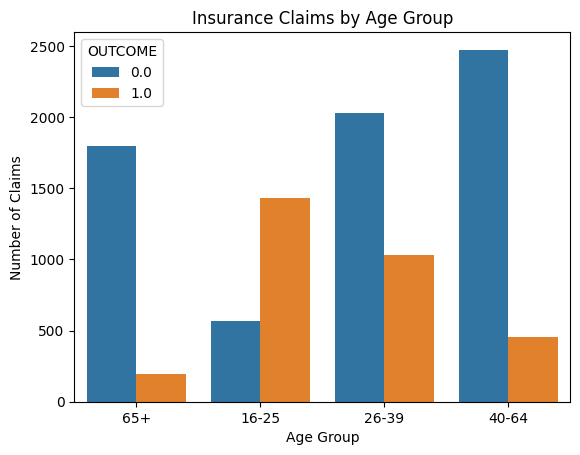

In [469]:
# Countplot
sns.countplot(df, x="AGE", hue="OUTCOME")

plt.title("Insurance Claims by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims")

**Comments & Observations:**

```Insurance Claims``` are the highest in the ```Age Group``` 16-25 year and much lower in the 65+ year group.

Text(0, 0.5, 'Number of Claims')

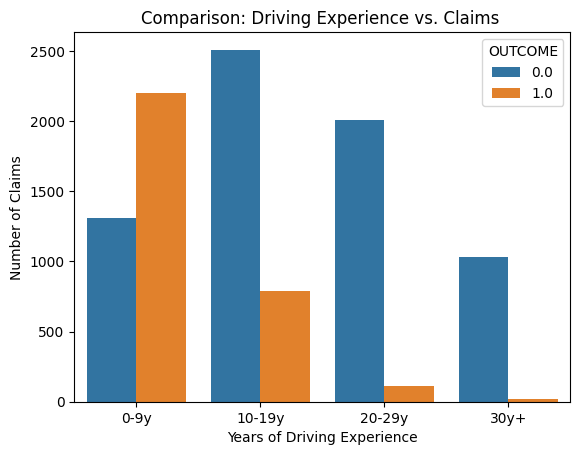

In [470]:
# Countplot
sns.countplot(df, x="DRIVING_EXPERIENCE", hue="OUTCOME")

plt.title("Comparison: Driving Experience vs. Claims ")
plt.xlabel("Years of Driving Experience")
plt.ylabel("Number of Claims")

**Comments & Observations:**

- Claims are reduced by Clients with more ```Years of Driving Experience```; e.g. 20-29 year & 30+ year groups.
- Claims are more likely to occur in the group where Clients have ```0-9 years of Driving Experience```.

Text(0.5, 1.0, 'Comparison: Speeding Violations vs. Past Accidents')

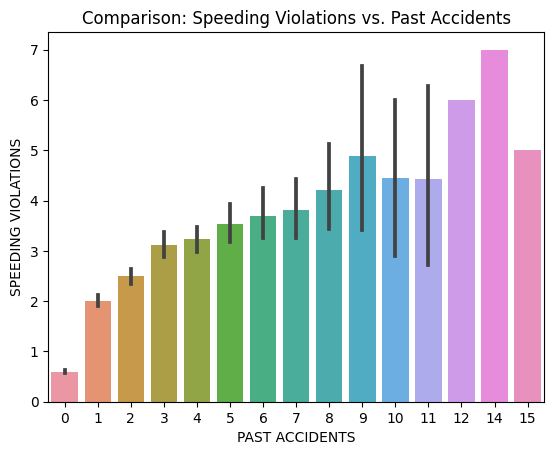

In [471]:
# Barplot
sns.barplot(data=df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS')

plt.xlabel("PAST ACCIDENTS")
plt.ylabel("SPEEDING VIOLATIONS")
plt.title("Comparison: Speeding Violations vs. Past Accidents")

**Comments & Observations:**

- The above visual shows that a drive style that goes with speeding (i.e. ```Speeding Violations```) - contributes to the increase of accident incidents (i.e. ```Past Accidents```) of Clients.


## **Preprocessing for Modelling**

**Create a Copy of Data (ML model use)**

In [472]:
df_ml = df.copy()

**Check Class Balance**

In [473]:
# Check how many samples of each class are present
df_ml['OUTCOME'].value_counts(normalize=False)

0.0    6862
1.0    3118
Name: OUTCOME, dtype: int64

**Split the Data**

In [474]:
# Define features (X) and target (y)
target = 'OUTCOME'
X = df_ml.drop(columns = target)
y = df_ml[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

**Check Class Balance**

In [475]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0.0    0.687508
1.0    0.312492
Name: OUTCOME, dtype: float64

In [476]:
y_test.value_counts(normalize=True)

0.0    0.687776
1.0    0.312224
Name: OUTCOME, dtype: float64

**Numeric Transformation**

In [477]:
# A mean imputer will be used to impute missing values for the numeric columns

# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [478]:
num_selector(X_train)

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

**Ordinal Transformation**

In [479]:
# Ordinal - Category Lists
ordinal_cols = ['EDUCATION', 'INCOME', 'VEHICLE_YEAR']

education_list = ['high school','university']
income_list = ['poverty', 'working class', 'middle class ', 'upper class']
vehicle_year_list = ['before 2015', 'after 2015']

# Transformers
ord = OrdinalEncoder(categories=[education_list, income_list,vehicle_year_list],handle_unknown='use_encoded_value',unknown_value = -1)

# Most frequent imputer option will be used to impute missing values for the ordinal columns
freq_imputer = SimpleImputer(strategy='most_frequent')

# More than 2 ordinal values exist for each column - scaler will be used
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

# Tuple
ordinal_tuple = (ord_pipeline, ordinal_cols)

**Nominal Transformation**

In [480]:
# Define the list of nominal features
ohe_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns
ohe_cols

# Instantiate OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Instantiate the pipeline
ohe_pipeline = make_pipeline(ohe_encoder)

# Tuple
ohe_tuple = (ohe_pipeline, ohe_cols)

In [481]:
# Instantiate - column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       ordinal_tuple,
                                       ohe_tuple,
                                       remainder='drop')
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[...
                                                                             ['before '
                                                                              '2015',
                                                                              'after '
                                                                              '2015']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['EDUCATION', 'INCOME', 'VEHICLE_YEAR']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])

## **Modelling**

In [482]:
# Function used to display the classification metrics of the model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Compile classification report for the test data
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

**A. Model: K-Nearest Neighbors (KNN)**

In [483]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

 - **Evaluation: K-Nearest Neighbors (KNN)**


In [484]:
# Save the model's predictions for Train dataset
knn_train_preds = knn_pipe.predict(X_train)

# Save the model's predictions for Test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [485]:
# Print the classification reports
labels = ['0','1']
print('TRAIN REPORT')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('TEST REPORT')
print(classification_report(y_test, knn_test_preds, target_names=labels))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5146
           1       0.79      0.75      0.77      2339

    accuracy                           0.86      7485
   macro avg       0.84      0.83      0.83      7485
weighted avg       0.86      0.86      0.86      7485

TEST REPORT
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1716
           1       0.73      0.71      0.72       779

    accuracy                           0.83      2495
   macro avg       0.80      0.79      0.80      2495
weighted avg       0.83      0.83      0.83      2495



In [486]:
# Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

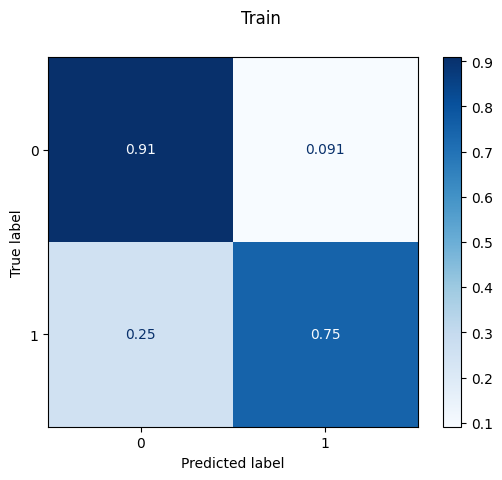

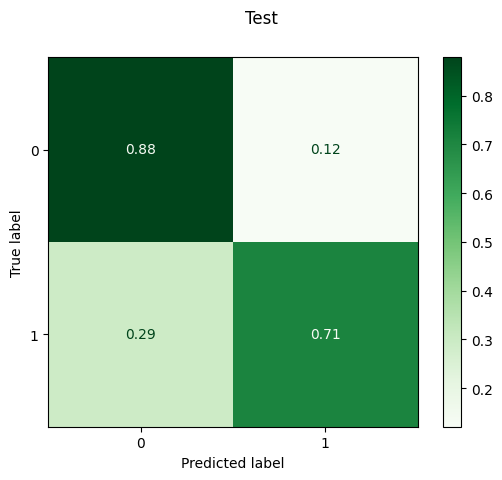

In [487]:
# Create Confusion Matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Blues')
plt.suptitle('Train');


ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Test');

 - **Hyperparameter Tuning**

In [488]:
# Display the hyperparameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[[...
                                                                                ['before '
                              

In [489]:
# Create dictionary of parameters
params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [490]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                        ('pipeline-3',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [491]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'uniform'}

In [492]:
knn_gs.best_score_

0.8172344689378758

In [493]:
best_knn = knn_gs.best_estimator_

In [494]:
# Check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [495]:
print('TRAIN\n', classification_report(y_train, train_preds))
print('TEST\n', classification_report(y_test, test_preds))

TRAIN
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5146
         1.0       0.76      0.72      0.74      2339

    accuracy                           0.84      7485
   macro avg       0.82      0.81      0.81      7485
weighted avg       0.84      0.84      0.84      7485

TEST
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1716
         1.0       0.74      0.71      0.72       779

    accuracy                           0.83      2495
   macro avg       0.80      0.80      0.80      2495
weighted avg       0.83      0.83      0.83      2495



Text(0.5, 1.0, 'Test: Confusion Matrix')

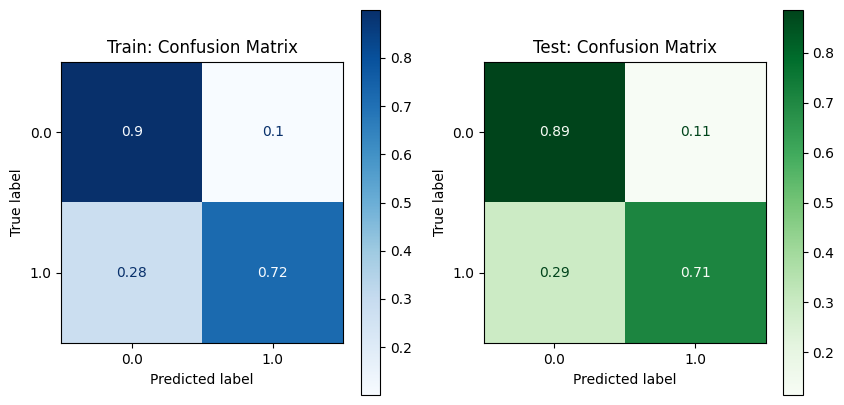

In [496]:
# Re-check the class balance for metric selection
# Display the Train & Test Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')
axes[0].set_title('Train: Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')
axes[1].set_title('Test: Confusion Matrix')

**Note:**

Following the hypertuning of the K-Nearest Neighbors (KNN) model - a minor improvement can be noticed in the Test scores.

**B. Model: Logistic Regression Model**

In [497]:
lr = LogisticRegression(random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal...
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [498]:
# Save the model's predictions for the Train dataset
lr_train_preds = lr_pipe.predict(X_train)
# Save the model's predictions for the Test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [499]:
# Print the classification reports
print('TRAIN REPORT')
print(classification_report(y_train, lr_train_preds))

print('TEST REPORT')
print(classification_report(y_test, lr_test_preds))

TRAIN REPORT
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      5146
         1.0       0.76      0.71      0.73      2339

    accuracy                           0.84      7485
   macro avg       0.81      0.80      0.81      7485
weighted avg       0.84      0.84      0.84      7485

TEST REPORT
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1716
         1.0       0.78      0.76      0.77       779

    accuracy                           0.86      2495
   macro avg       0.83      0.83      0.83      2495
weighted avg       0.86      0.86      0.86      2495



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      5146
         1.0       0.59      0.91      0.71      2339

    accuracy                           0.77      7485
   macro avg       0.77      0.81      0.76      7485
weighted avg       0.83      0.77      0.78      7485



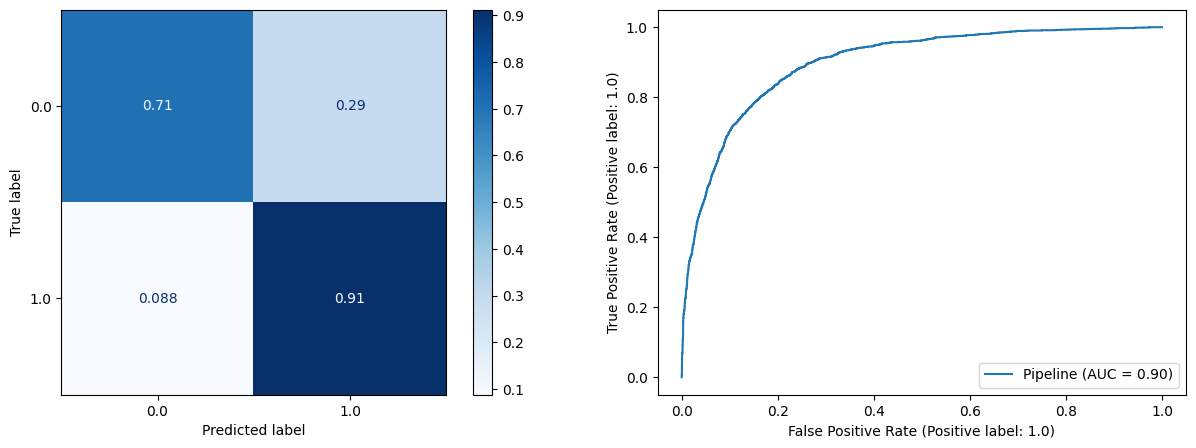

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81      1716
         1.0       0.59      0.90      0.71       779

    accuracy                           0.77      2495
   macro avg       0.76      0.81      0.76      2495
weighted avg       0.83      0.77      0.78      2495



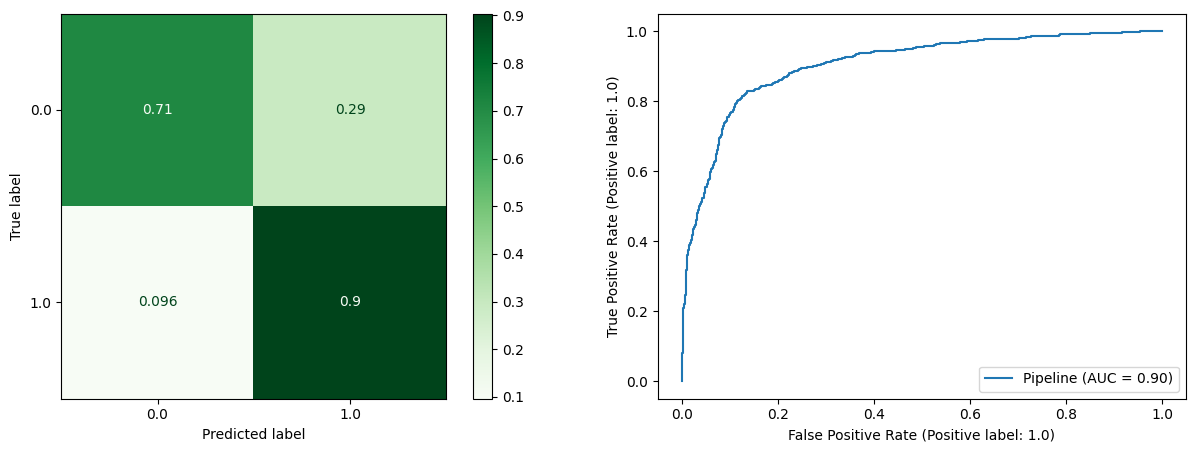

In [500]:
# Use the function twice to evaluate the model on Training & Test data
classification_metrics(lr_pipe, X_train,y_train, thresh=.2,cmap='Blues', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.2, cmap='Greens', label='Test Data')

In [501]:
# Display the hyperparameters
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[[...
                                                                                ['before '
                              

In [502]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [503]:
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                          'INCOME',
                                                                          'VEHICLE_YEAR']),
                                                                        ('pipeline-3',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [504]:
lr_gs.best_params_

{'logisticregression__C': 10}

In [505]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      5146
         1.0       0.59      0.91      0.71      2339

    accuracy                           0.77      7485
   macro avg       0.77      0.81      0.76      7485
weighted avg       0.83      0.77      0.78      7485



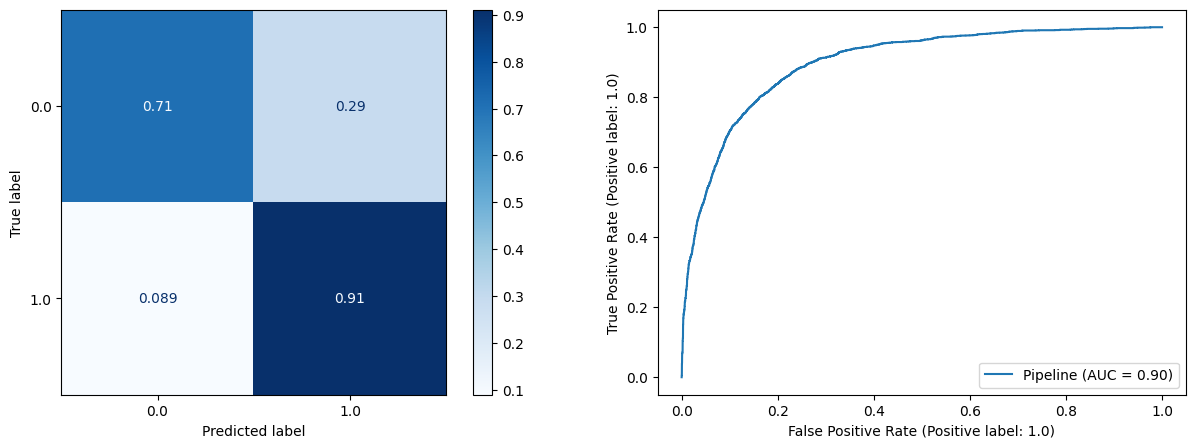

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81      1716
         1.0       0.59      0.91      0.71       779

    accuracy                           0.77      2495
   macro avg       0.77      0.81      0.76      2495
weighted avg       0.83      0.77      0.78      2495



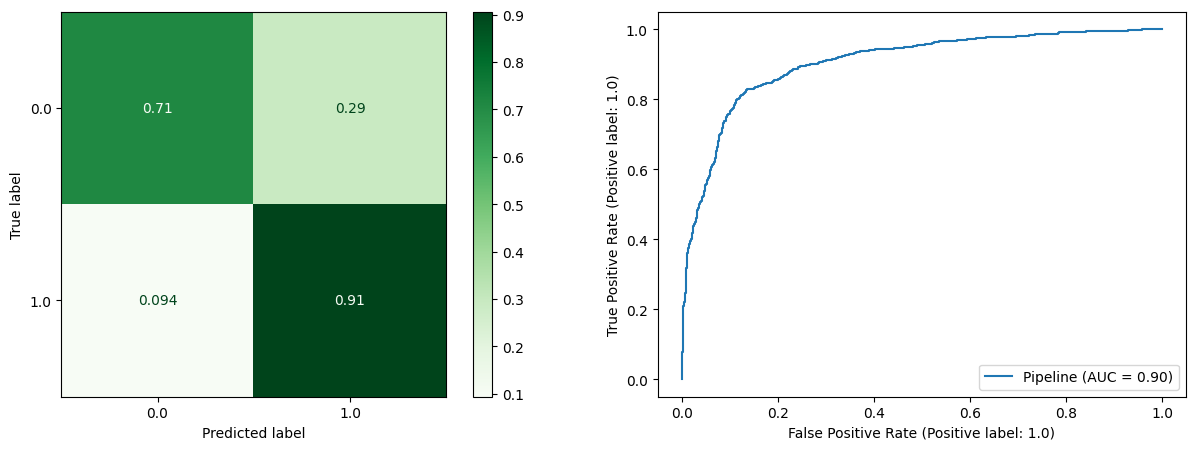

In [506]:
# Use the function twice to evaluate model on Training & Test data
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

**C. Model: Logistic Regression - using Principal Component Analysis (PCA)**

In [507]:
pca = PCA()
lr_pca_pipe = make_pipeline(preprocessor, pca, lr)
lr_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e0002d29db0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal...
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                ('pca', PCA()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [508]:
# Predictions
lr_pca_train_preds = lr_pca_pipe.predict(X_train)
lr_pca_test_preds  = lr_pca_pipe.predict(X_test)

In [509]:
# Reports
print('TRAIN')
print(classification_report(y_train, lr_pca_train_preds))
print('TEST')
print(classification_report(y_test, lr_pca_test_preds))

TRAIN
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      5146
         1.0       0.76      0.71      0.73      2339

    accuracy                           0.84      7485
   macro avg       0.81      0.80      0.81      7485
weighted avg       0.84      0.84      0.84      7485

TEST
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1716
         1.0       0.78      0.76      0.77       779

    accuracy                           0.86      2495
   macro avg       0.83      0.83      0.83      2495
weighted avg       0.86      0.86      0.86      2495



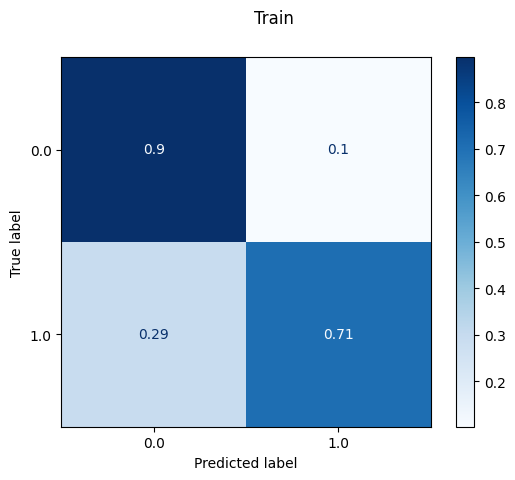

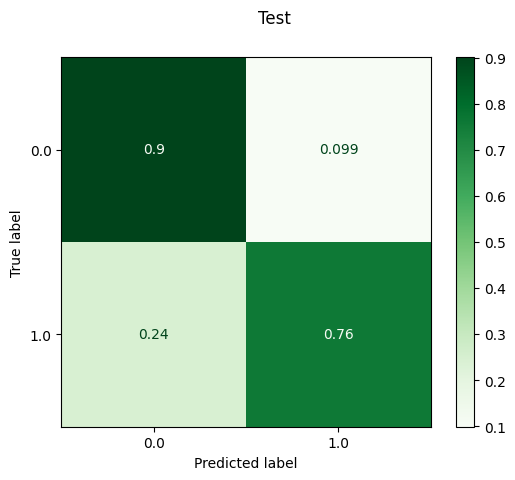

In [510]:

ConfusionMatrixDisplay.from_predictions(y_train, lr_pca_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(y_test, lr_pca_test_preds,
               normalize='true', cmap='Greens')
plt.suptitle('Test');

### **Model: Outcomes & Findings:**

When assessing the outcomes from each of the above Models ...

My preference is with Option | Model "C" - i.e. the **Logistic Regression Model - using Principal Component Analysis (PCA)**.

- Preference is based on the accuracy rate of this model.
- As per metrics provided above - this model achieves an accuracy rating of 86%.
- This model was compiled by using *Principal Component Analysis (PCA)* in an attempt to reduce the dimensionality (number of features) within the dataset.
- This was done by still retaining as much as possible relevant information for the Stakeholders.  
- PCA is mainly used for variables which are strongly correlated.
- Note:  
  - If the relationship is weak between variables, PCA does not work well to reduce data.
  - If most of the correlation coefficients are smaller than 0.3 - PCA will not assist / be optimal to use.

**Specific recommendations to the Stakeholders - as per model findings:**
- Management of claims & costing of insurance products (premiums) can be optimized by taking note of events that increase claim (accident) incidents; e.g. :
  - Speeding drive styles by Clients
  - Clients with limited years of Driving Experience
  - Clients that fall in younger age groups
  - Client with lower income levels, etc.
- The Insurance Company can also potentially increase profits (reduce claims) by expanding the below segments of their current Client base:
 - Clients with 20+ years driving experience
 - Clients of 40+ years of age, etc.